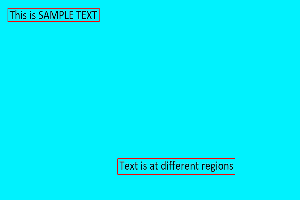

In [ ]:
# Import required packages
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

# Read image from which text needs to be extracted
image_url = 'https://media.geeksforgeeks.org/wp-content/uploads/20200131205801/sample4.jpg'
img = io.imread(image_url)

# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Drawing a rectangle on image
    rect = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(cv2.resize(img,(300,200)))

# Face and Eyes Detection

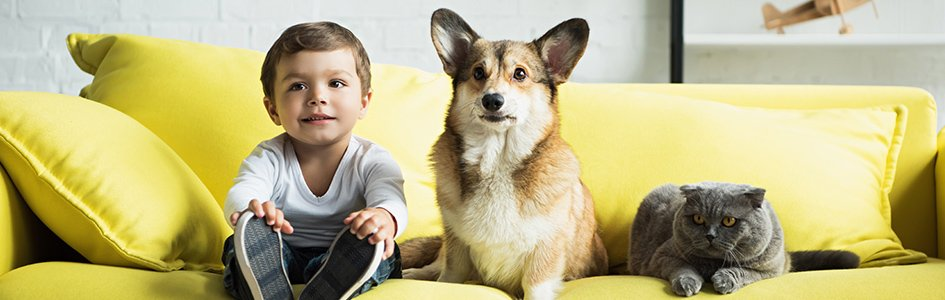

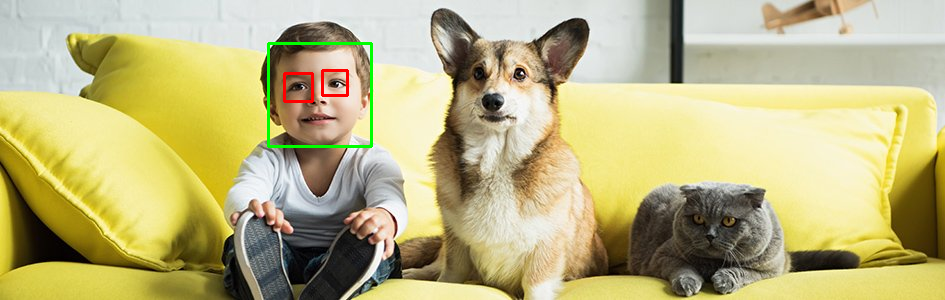

In [ ]:
# face and eyes detection using Haar-cascade pre-trained data
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

# Load the pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the pre-trained Haar cascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load the input image
image_url = 'https://assets.answersingenesis.org/img/cms/content/contentnode/header_image/what-are-humans-animals-mammals-neither.jpg'
image = io.imread(image_url)
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)

# Display the output image
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

#Remove Background

In [ ]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.2 MB/s eta 0:00:00


In [ ]:
    # Remove Background

from rembg import remove
from PIL import Image
from skimage import io
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Read image
input_image = io.imread('/content/photo resize w3.5 h4.5 40kb.jpeg')
input_image_pil = Image.fromarray(np.uint8(input_image)).convert('RGBA')

# Display the input image
cv2_imshow(cv2.cvtColor(np.array(input_image_pil), cv2.COLOR_RGBA2BGR))

# Remove background
output = remove(input_image_pil)

# Save the output image
output_path = 'removedBG.png'
output.save(output_path)

cv2_imshow(cv2.cvtColor(np.array(output), cv2.COLOR_RGBA2BGR))


FileNotFoundError: No such file: '/content/photo resize w3.5 h4.5 40kb.jpeg'

In [ ]:
    # Remove Background

from rembg import remove
from PIL import Image

# upload image in google colab files and import image_path
input_path = '/content/photo resize w3.5 h4.5 40kb.jpeg'

output_path = 'MyPhoto.png'
input = Image.open(input_path)
input = input.convert('RGBA')
output = remove(input)
output.save(output_path)

(1052, 655, 3)


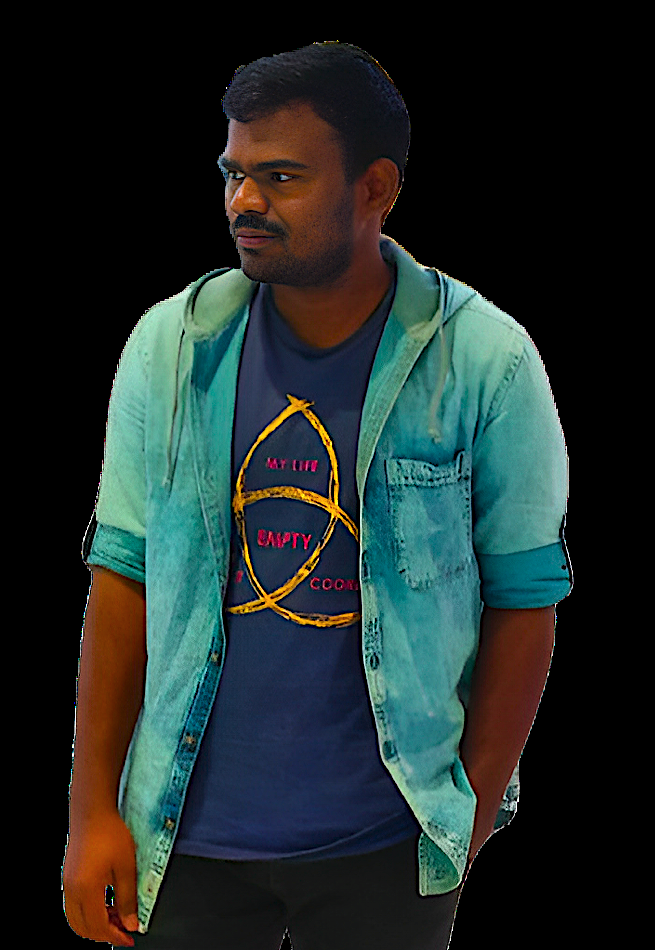

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def crop_image(input_path, output_path, x, y, width, height):
    # Read the image
    image = cv2.imread(input_path)
    print(image.shape)

    # Crop the image
    cropped_image = image[y:y+height, x:x+width]
    cv2_imshow(cropped_image)

    # Save the cropped image
    cv2.imwrite(output_path, cropped_image)

# Example usage
input_path = '/content/MyPhoto.png'
output_path = '/content/MyPhoto.png'
x = 0   # x-coordinate of the top-left corner of the cropping box
y = 0   # y-coordinate of the top-left corner of the cropping box
width = 655 # width of the cropping box
height = 950 # height of the cropping box

crop_image(input_path, output_path, x, y, width, height)

#Object Detection and Tracking

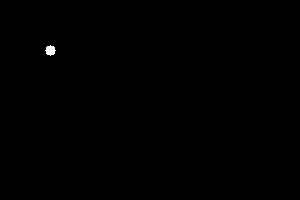

[[53. 53.]]


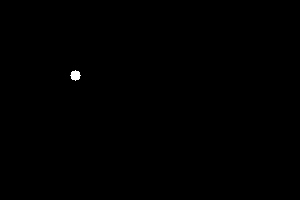

[[78.00016 78.00016]]
78 78 53 53


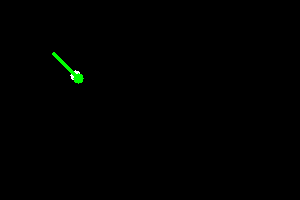

In [ ]:
      # Lucas Kanade Method
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Read two consecutive frames
frame = np.zeros((200, 300,3), dtype=np.uint8)
frame1 = cv2.circle(frame,(50,50),5,(255,255,255),-1)
frame = np.zeros((200, 300,3), dtype=np.uint8)
frame2 = cv2.circle(frame,(75,75),5,(255,255,255),-1)

# Convert frames to grayscale
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)


# Parameters for Shi-Tomasi corner detection
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=10, blockSize=5)

# Detect corners in the first frame
corners = cv2.goodFeaturesToTrack(gray1, mask=None, **feature_params)

# Calculate optical flow
corners_next, status, _ = cv2.calcOpticalFlowPyrLK(gray1, gray2, corners, None)

# Select good points for optical flow
good_points = corners_next[status == 1]
good_prev_points = corners[status == 1]

cv2_imshow(frame1)
print(good_prev_points)
cv2_imshow(frame2)
print(good_points)

# Draw the optical flow vectors
for i, (new, old) in enumerate(zip(good_points, good_prev_points)):
    a, b = new.ravel().astype(int)
    c, d = old.ravel().astype(int)
    print(a,b,c,d)
    frame2 = cv2.line(frame2, (a, b), (c, d), (0, 255, 0), 2)
    frame2 = cv2.circle(frame2, (a, b), 5, (0, 255, 0), -1)

# Display the frames with optical flow
cv2_imshow(frame2)


In [ ]:
      # Point Object input video
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython.display as ipd

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
fps = 3
width = 300
height = 200

# make input point objects video
input_video = cv2.VideoWriter('input_point_objects.mp4', fourcc, fps, (width, height))
x,y = 50,50

for i in range(50):
  frame = np.zeros((200, 300,3), dtype=np.uint8)
  x,y = x+3,y+2
  pointOnFrame = cv2.circle(frame,(x,y),2,(255,255,255),-1)
  input_video.write(pointOnFrame)

# Display video in google colab
ipd.Video('input_point_objects.mp4', width=700,height=400,embed=True)

56.002216 54.002476


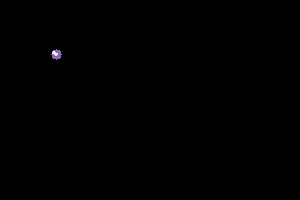

58.993168 56.014637


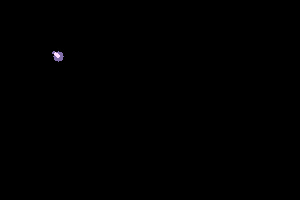

61.99481 58.001644


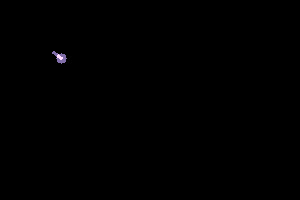

64.9988 60.004654


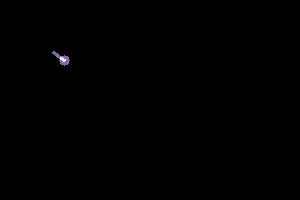

67.993774 62.00042


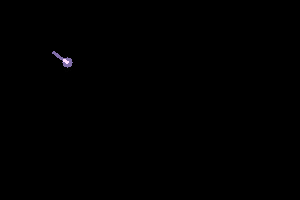

70.984375 64.012375


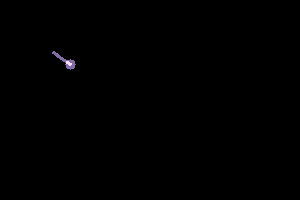

73.98622 65.99887


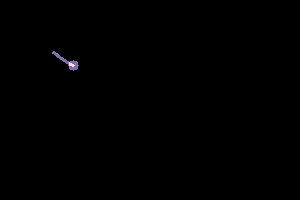

76.989204 67.99582


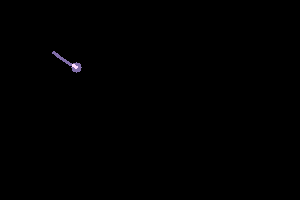

79.99217 69.99826


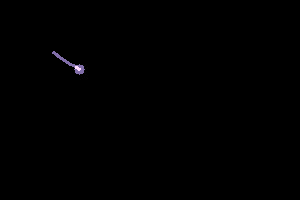

82.98262 72.01043


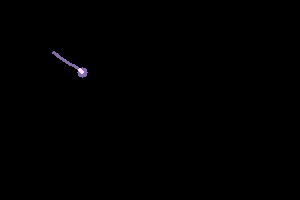

85.9849 73.99743


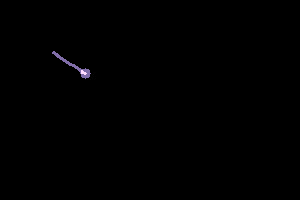

88.99218 75.99862


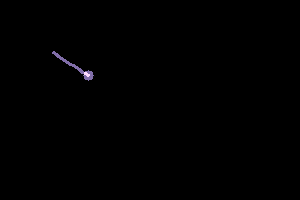

91.98771 77.99445


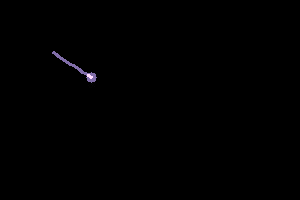

94.97804 80.00645


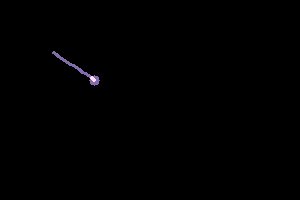

97.980064 81.992905


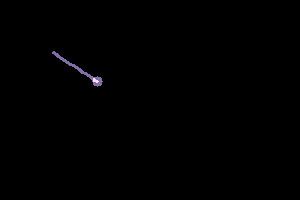

100.982834 83.99246


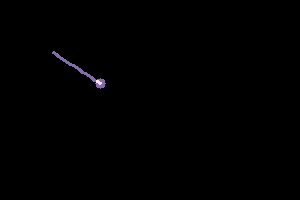

103.98602 85.99485


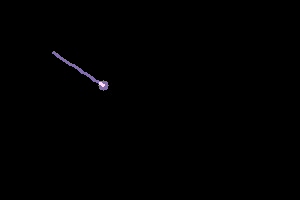

106.97604 88.00719


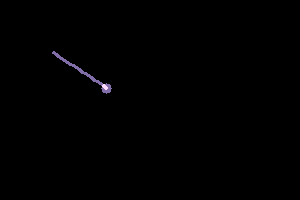

109.978714 89.99397


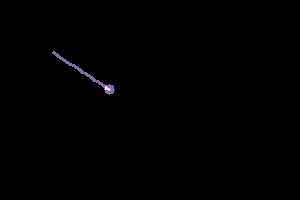

112.98603 91.99514


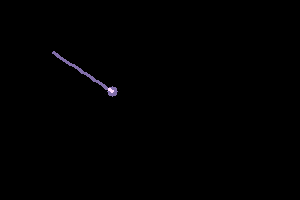

115.981834 93.99084


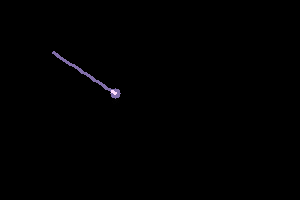

118.97198 96.00286


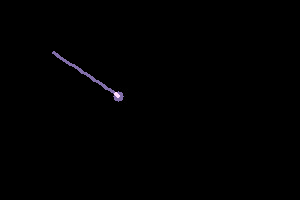

121.97436 97.98937


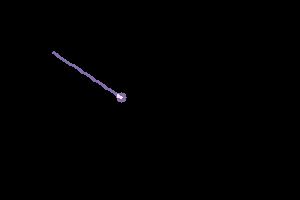

124.98012 99.988556


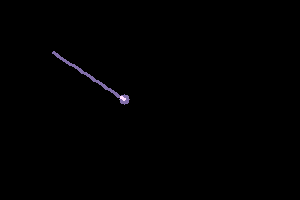

127.983345 101.99103


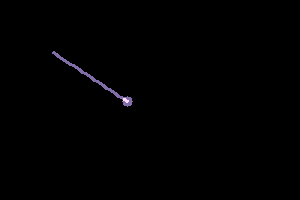

130.97334 104.00329


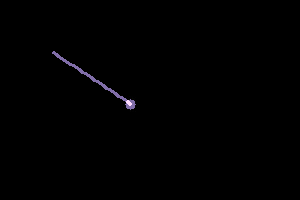

133.97629 105.99015


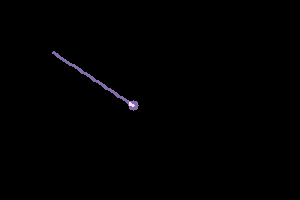

136.98361 107.99115


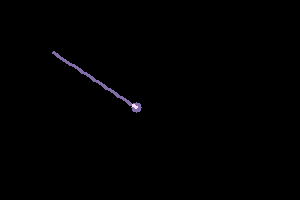

139.9797 109.98685


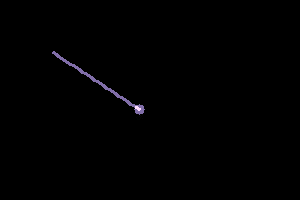

142.96974 111.998886


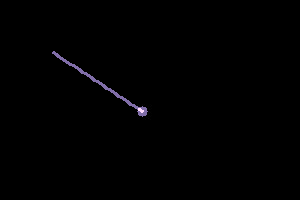

145.97221 113.985245


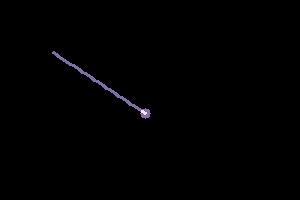

148.97427 115.984795


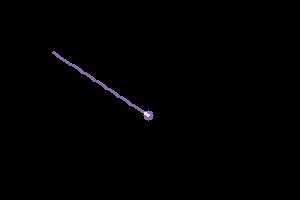

151.97815 117.98714


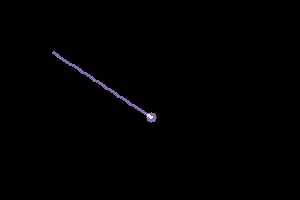

154.96768 119.999405


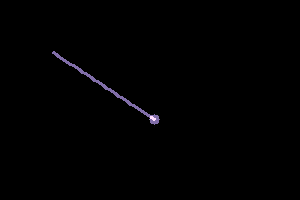

157.97101 121.98619


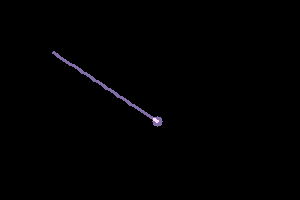

160.97856 123.98723


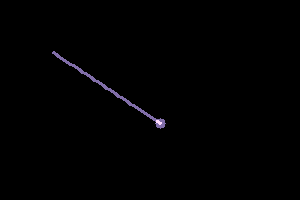

163.97505 125.983025


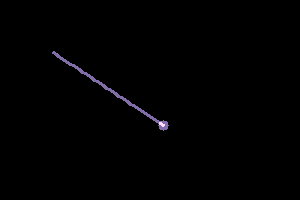

166.96481 127.994965


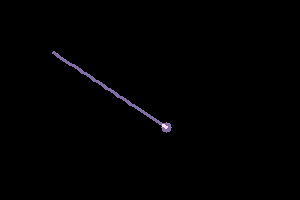

169.96759 129.98149


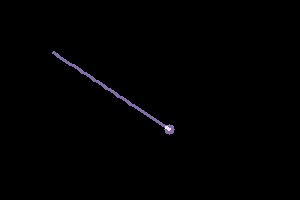

172.96953 131.98114


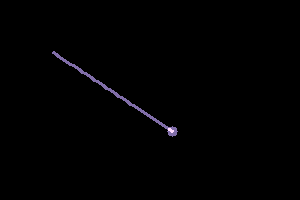

175.97374 133.98349


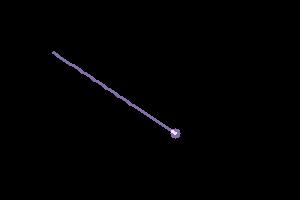

178.96289 135.99577


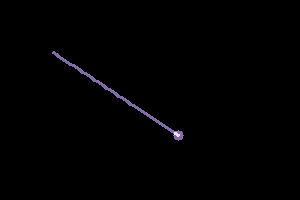

181.96646 137.98257


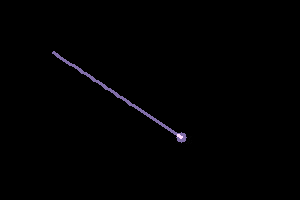

184.97398 139.98354


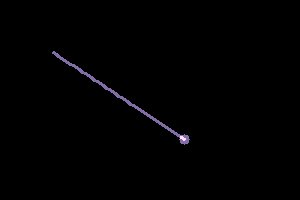

187.97063 141.97926


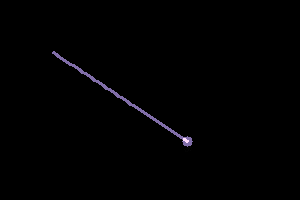

190.96019 143.9912


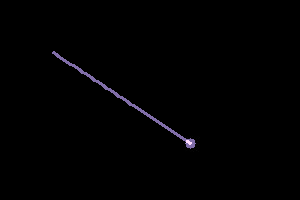

193.96333 145.9776


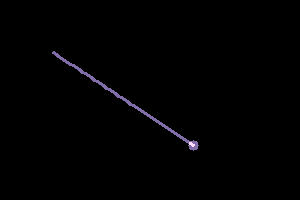

196.96489 147.97723


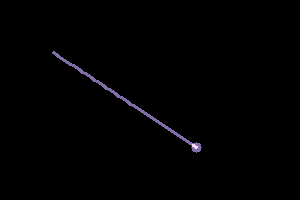

199.96944 149.97963


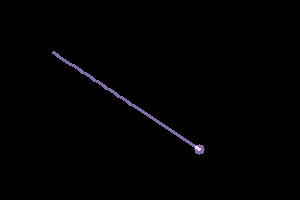

No frames grabbed!


In [ ]:
      # single / multiple point object tracking
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import IPython.display as ipd

cap = cv.VideoCapture("input_point_objects.mp4")

# Define the codec and create VideoWriter object
# fourcc = cv.VideoWriter_fourcc(*'XVID')
# out = cv.VideoWriter('video2_output.mp4', fourcc, 20.0, (640,  480))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter('object_tracking.mp4', fourcc, fps, (width, height))

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0, 255, (100, 3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
  ret, frame = cap.read()
  if not ret:
    print('No frames grabbed!')
    break
  frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
  # calculate optical flow
  p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
  # Select good points
  if p1 is not None:
    good_new = p1[st==1]
    good_old = p0[st==1]
  # draw the tracks
  for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    print(a,b)
    mask = cv.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
    frame = cv.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
  img = cv.add(frame, mask)
  cv2_imshow(img)
  # write the flipped frame
  out.write(img)

  k = cv.waitKey(5) & 0xff
  if k == 27:
    break
  # Now update the previous frame and previous points
  old_gray = frame_gray.copy()
  p0 = good_new.reshape(-1, 1, 2)

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

In [ ]:
ipd.Video('object_tracking.mp4', width=700,height=400,embed=True)

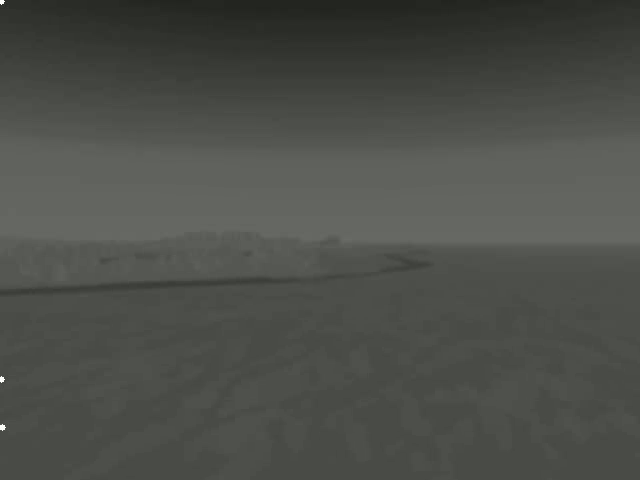

AttributeError: ignored

In [ ]:
      # single / multiple point object tracking
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import IPython.display as ipd

cap = cv.VideoCapture("movingBackgroundVideo_2.0_100.avi")

# Define the codec and create VideoWriter object
# fourcc = cv.VideoWriter_fourcc(*'XVID')
# out = cv.VideoWriter('video2_output.mp4', fourcc, 20.0, (640,  480))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter('object_tracking.mp4', fourcc, fps, (width, height))

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0, 255, (100, 3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
cv2_imshow(frame)
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

print("Shape of p0:", p0.shape)
print("Data type of p0:", p0.dtype)


# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
  ret, frame = cap.read()
  if not ret:
    print('No frames grabbed!')
    break
  frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
  # calculate optical flow
  p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
  # Select good points
  if p1 is not None:
    good_new = p1[st==1]
    good_old = p0[st==1]
  # draw the tracks
  for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    print(a,b)
    mask = cv.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
    frame = cv.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
  img = cv.add(frame, mask)
  # write the flipped frame
  out.write(img)

  k = cv.waitKey(5) & 0xff
  if k == 27:
    break
  # Now update the previous frame and previous points
  old_gray = frame_gray.copy()
  p0 = good_new.reshape(-1, 1, 2)

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

In [ ]:
import cv2 as cv
# Initialize video capture
cap = cv.VideoCapture('car_traffic.mp4')  # Replace 'path_to_video' with the path to your video file


# Get video properties
fps = cap.get(cv.CAP_PROP_FPS)
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'MJPG')
out = cv.VideoWriter('output_car.mp4', fourcc, fps, (width, height))

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
x, y, w, h = 300, 200, 100, 50 # simply hardcoded the values
track_window = (x, y, w, h)

# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
    # write the flipped frame
        out.write(img2)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break

# Display video in google colab
import IPython.display as ipd
ipd.Video('output_car.mp4', width=700,height=400,embed=True)

# Special One - Friendship day wishes

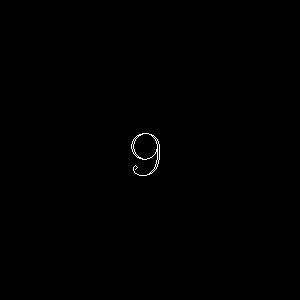

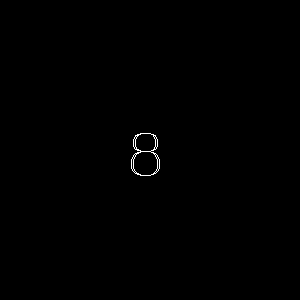

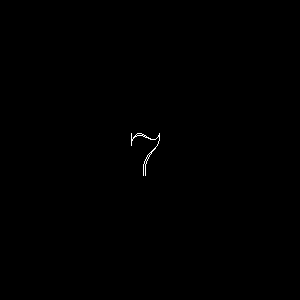

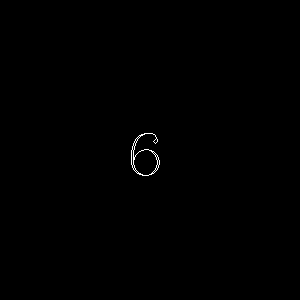

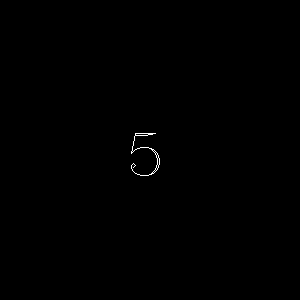

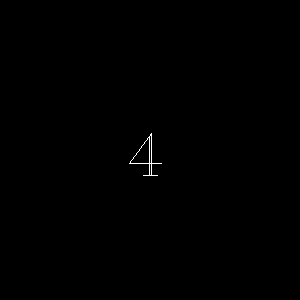

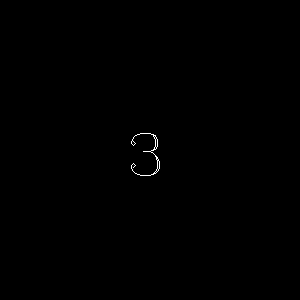

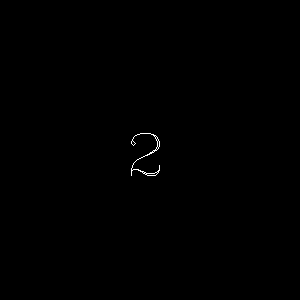

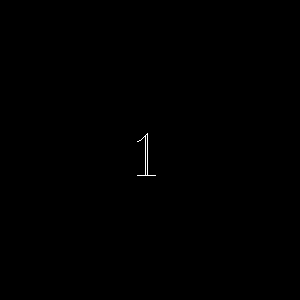

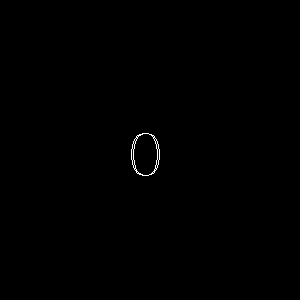

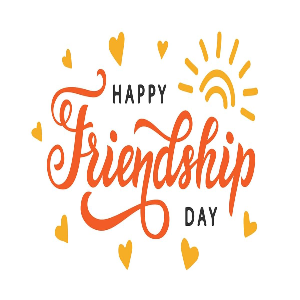

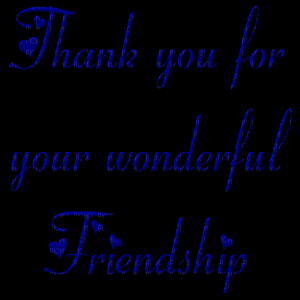

In [ ]:
import cv2
from skimage import io
import time
import numpy as np
from google.colab.patches import cv2_imshow

img = io.imread('https://images.thequint.com/thequint/2019-08/3e4e5fe6-3e36-4649-9058-aaef77553fa3/iStock_815506768.jpg?auto=format,compress&fmt=webp&format=webp&w=1200&h=900&dpr=1.0')
img1 = io.imread('https://img1.picmix.com/output/stamp/normal/8/9/7/8/818798_905cc.gif')
bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

org = (125,175)
font = cv2.FONT_HERSHEY_COMPLEX
fontScale = 2
color = (255, 255, 255)
thickness = 1


for i in range(10):
  image1 = np.zeros((300, 300), dtype=np.uint8)
  text = str(9-i)
  text_img = cv2.putText(image1,text,org,font,fontScale,color,thickness)
  cv2_imshow(text_img)
  print(' ')
  time.sleep(2)

resized_image = cv2.resize(bgr_img, (300, 300))
cv2_imshow(resized_image)
print(' ')
time.sleep(2)
cv2_imshow(cv2.resize(img1,(300,300)))

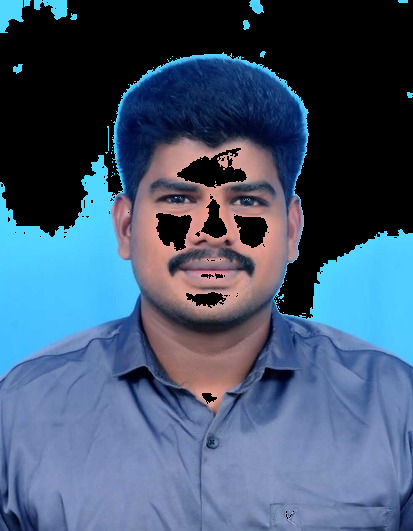

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/photo resize w3.5 h4.5 40kb.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to separate the foreground (object) from the background
_, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

# Invert the thresholded image to get the background as white and the foreground as black
thresh = cv2.bitwise_not(thresh)

# Apply the inverted thresholded image as a mask to the original image
result = cv2.bitwise_and(image, image, mask=thresh)

# Save the result
# cv2.imwrite('output_image.jpg', result)
cv2_imshow(result)
